In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the Datset
data = pd.read_csv("train.csv")

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Clean the data
data = data.drop(["Cabin","Ticket","Name","PassengerId","Fare"], axis = 1)
data = data.dropna()

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# Convert categorical variables into numerical variables
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


<Axes: xlabel='Sex', ylabel='count'>

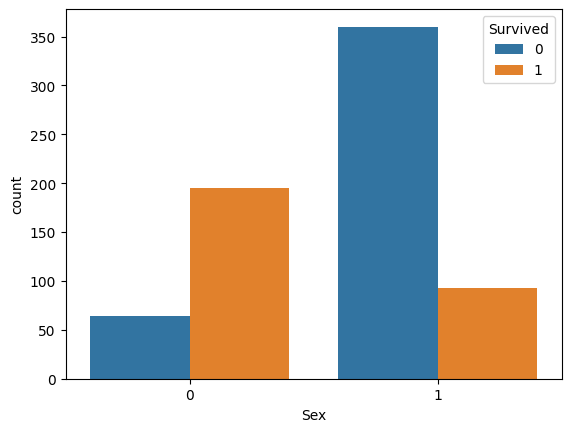

In [ ]:
# Visualize the survival rate by gender
sns.countplot(x = "Sex", hue = "Survived", data = data)

<Axes: xlabel='Age', ylabel='Density'>

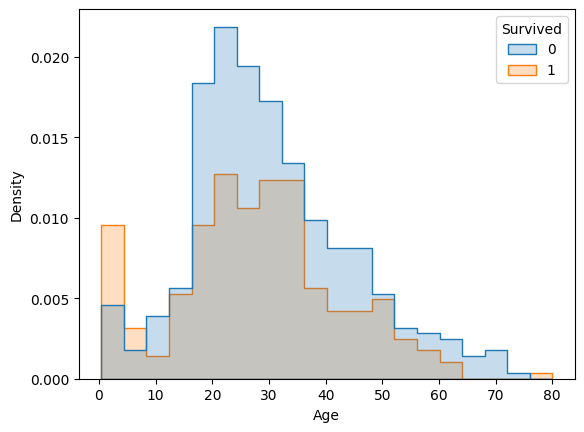

In [ ]:
# Visualize the survival rate by age
sns.histplot(data = data, x = "Age", hue = "Survived", element = "step", stat = "density")

<Axes: xlabel='Pclass', ylabel='count'>

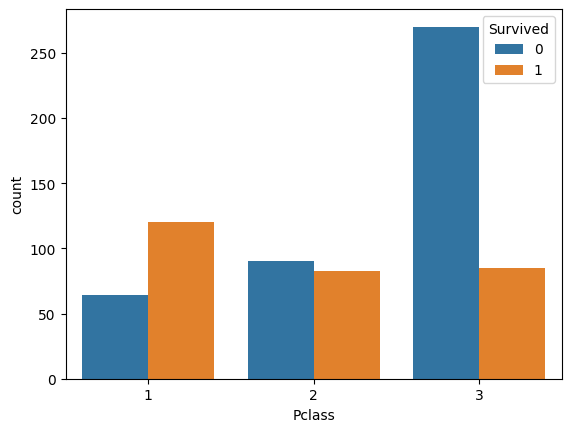

In [ ]:
# Visualize the survival rate by socio-economic class
sns.countplot(x = "Pclass", hue = "Survived", data = data)

In [ ]:
# Feature Selection
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]

In [ ]:
# Split the data into training and testing sets
X = data[features]
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Train the random forest model
model = RandomForestClassifier(n_estimators = 100, random_state =42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.7762237762237763
Precision:  0.7818181818181819
Recall:  0.6825396825396826
F1 Score:  0.7288135593220338


In [ ]:
# Get the feature importance from the random forest model
importances = model.feature_importances_
feature_importance = sorted(zip(importances, features), reverse = True)
print("Feature Importance: ", feature_importance)

Feature Importance:  [(0.4145794575841735, 'Age'), (0.299188650083782, 'Sex'), (0.14757067148253725, 'Pclass'), (0.06408204674076623, 'SibSp'), (0.043780126935634225, 'Parch'), (0.030799047173106758, 'Embarked')]
